<a href="https://colab.research.google.com/github/Sayed-Hossein-Hosseini/Saving_Titanic_Passengers_From_Disaster/blob/master/Saving_Titanic_Passengers_From_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Saving Titanic Passengers From Disaster**

## **Libraries**

In [1]:
!pip install pandas openpyxl

import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

## **Data Loading**

In [2]:
# --- Settings ---
# Path to the training data Excel file
file_path_train = '/content/Titanic/train.csv'
# Path to the test data Excel file
file_path_test = '/content/Titanic/test.csv'

# If the data is not in the first sheet, specify the sheet name
# sheet_name_train = 'Sheet1' # Example
# sheet_name_test = 'Sheet1'  # Example
# --- End of Settings ---

# Initialize DataFrames to None to check if they were successfully loaded later
df_train = None
df_test = None

try:
    # Read the training data file (usually reads the first sheet by default)
    # If a different sheet is needed, use the sheet_name parameter:
    # df_train = pd.read_excel(file_path_train, sheet_name=sheet_name_train)
    df_train = pd.read_csv(file_path_train)
    print(f"Training DataFrame successfully read from file '{file_path_train}'.")
    print("First few rows of the training DataFrame:")
    print(df_train.head())
    print("-" * 30)

except FileNotFoundError:
    print(f"Error: Training file '{file_path_train}' not found. Please check the file path.")
except Exception as e:
    print(f"Error reading the training file: {e}")


try:
    # Read the test data file (usually reads the first sheet by default)
    # If a different sheet is needed, use the sheet_name parameter:
    # df_test = pd.read_excel(file_path_test, sheet_name=sheet_name_test)
    df_test = pd.read_csv(file_path_test)
    print(f"Test DataFrame successfully read from file '{file_path_test}'.")
    print("First few rows of the test DataFrame:")
    print(df_test.head())
    print("-" * 30)

    # Now you can work with df_train and df_test (if both were read successfully)
    # Example: Check if both DataFrames were loaded
    if df_train is not None and df_test is not None:
        print("Both training and test DataFrames loaded successfully.")
        # Add your data processing steps here...
    else:
        print("One or both DataFrames failed to load. Check previous error messages.")


except FileNotFoundError:
    print(f"Error: Test file '{file_path_test}' not found. Please check the file path.")
except Exception as e:
    print(f"Error reading the test file: {e}")

Training DataFrame successfully read from file '/content/Titanic/train.csv'.
First few rows of the training DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN 

## **Data Description**

In [3]:
# ==================================================
# Assume df_train and df_test are already loaded
# ==================================================
# Example (remove or comment out this section in your final code,
# as it assumes the DataFrames already exist):
# data_train = {'col_num1': [1, 2, 3, 4, 5],
#               'col_cat1': ['A', 'B', 'A', 'C', 'B'],
#               'col_num2': [10.1, 11.2, np.nan, 13.4, 14.5],
#               'col_mixed': [1, 'X', 3, 'Y', 5]}
# df_train = pd.DataFrame(data_train)

# data_test = {'col_num1': [6, 7, 8],
#              'col_cat1': ['C', 'A', 'C'],
#              'col_num2': [15.6, 16.7, 17.8],
#              'col_mixed': ['Z', 8, 9]}
# df_test = pd.DataFrame(data_test)
# --- End of Example Section ---


# Helper function to print DataFrame information
def describe_dataframe(df, df_name):
    """
    Prints descriptive and general information about a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to describe.
        df_name (str): The name of the DataFrame for display purposes (e.g., 'Training' or 'Test').
    """
    print("\n" + "="*60)
    print(f"          {df_name} Data Description")
    print("="*60)

    # First, check if the variable is actually a DataFrame or None
    if isinstance(df, pd.DataFrame):
        print(f"\n1. Shape (Rows, Columns) of {df_name} data:")
        print(df.shape)

        print(f"\n2. Basic Information for {df_name} data (Columns, Non-Null Counts, Dtypes):")
        # df.info() prints directly, so call it after the header
        # To capture output nicely in some environments, redirect to a string buffer
        buffer = io.StringIO()
        df.info(buf=buffer)
        info_str = buffer.getvalue()
        print(info_str)

        print(f"\n3. Numerical Features Summary Statistics for {df_name} data:")
        # Using round(2) for cleaner output
        try:
            # Select only numerical columns
            numeric_cols = df.select_dtypes(include=np.number)
            if not numeric_cols.empty:
                 print(numeric_cols.describe().round(2))
            else:
                 print("No numerical columns found.")
        except Exception as e:
            print(f"Could not generate numerical description: {e}")

        print(f"\n4. Categorical/Object Features Summary Statistics for {df_name} data:")
        try:
            # Select columns with 'object' dtype (usually strings or mixed types)
            object_cols = df.select_dtypes(include='object')
            if not object_cols.empty:
                print(object_cols.describe())
            else:
                print(f"No object/categorical columns found in the {df_name} data.")
        except Exception as e:
             print(f"Could not generate categorical description: {e}")

        print(f"\n5. Missing Values per Column in {df_name} data:")
        missing_values = df.isnull().sum()
        # Show only columns that actually have missing values
        missing_values = missing_values[missing_values > 0]
        if not missing_values.empty:
            print(missing_values)
        else:
            print(f"No missing values found in the {df_name} data.")

    # If the input was None or not a DataFrame
    elif df is None:
         print(f"'{df_name}' variable is None. Cannot display description.")
    else:
         print(f"'{df_name}' variable is not a pandas DataFrame. Type: {type(df)}. Cannot display description.")


# --- Check and Display Descriptive Information ---

# First, check if the variables df_train and df_test actually exist
# This prevents errors if, for example, one of the files failed to load in a previous step.
if 'df_train' in locals() or 'df_train' in globals():
    describe_dataframe(df_train, 'Training')
else:
    print("\nError: DataFrame 'df_train' does not exist in the current environment.")

if 'df_test' in locals() or 'df_test' in globals():
    describe_dataframe(df_test, 'Test')
else:
    print("\nError: DataFrame 'df_test' does not exist in the current environment.")


print("\n" + "="*60)
print("          End of Data Description")
print("="*60)


          Training Data Description

1. Shape (Rows, Columns) of Training data:
(891, 12)

2. Basic Information for Training data (Columns, Non-Null Counts, Dtypes):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3. Numerical Features Summary Statistics for Training data:
       Passenge

## **Data Visualizing**


      Visualizing Training Data (12 rows, 9 columns)

Identified Numerical Columns: ['Age']
Identified Categorical Columns: ['Sex', 'Ticket', 'Cabin', 'Embarked', 'Survival', 'Pclass', 'SibSp', 'Parch']

--- Visualizing Numerical Columns (1) for Training ---

Generating Histograms and Density Plots...


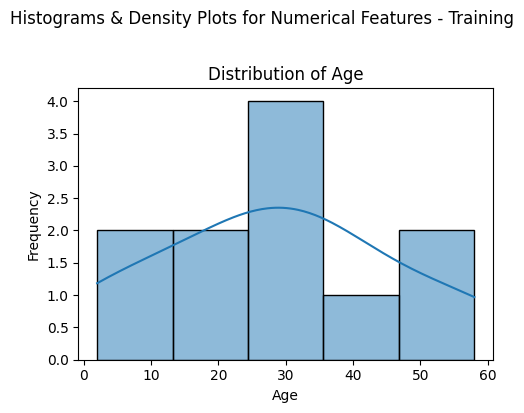


Generating Box Plots...


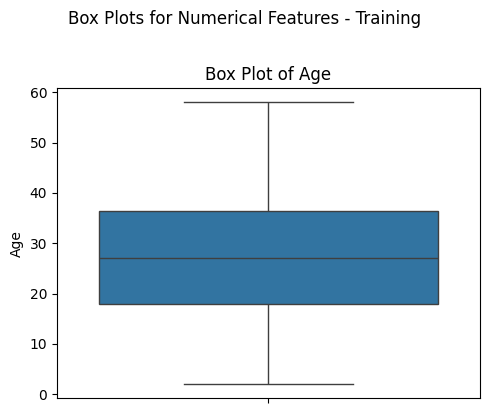


--- Visualizing Categorical Columns (8) for Training ---

Generating Count Plots...


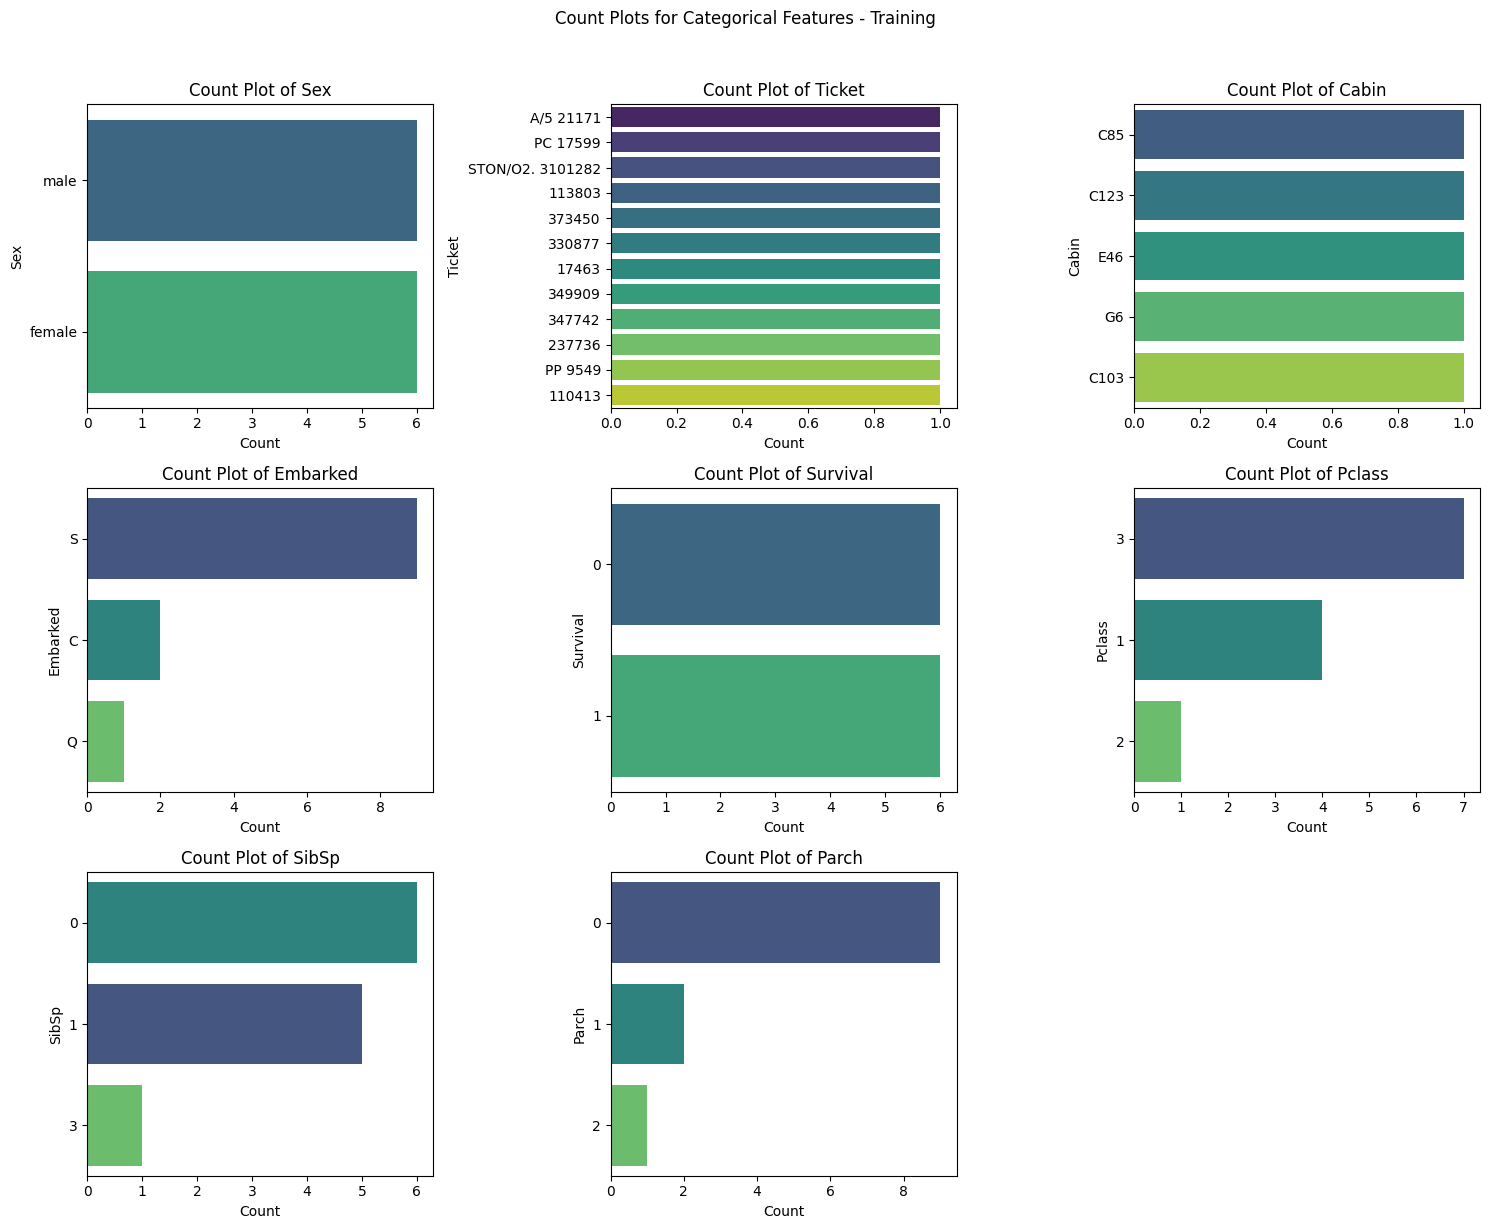


      Visualizing Test Data (8 rows, 8 columns)

Identified Numerical Columns: ['Age']
Identified Categorical Columns: ['Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass', 'SibSp', 'Parch']

--- Visualizing Numerical Columns (1) for Test ---

Generating Histograms and Density Plots...


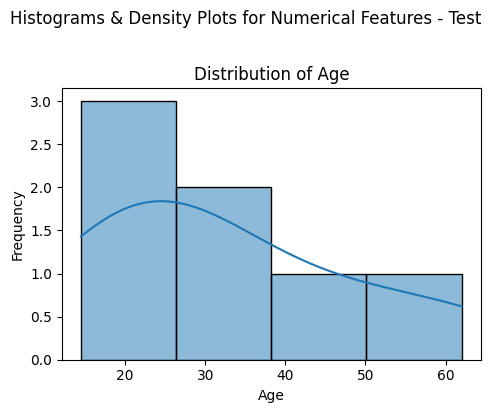


Generating Box Plots...


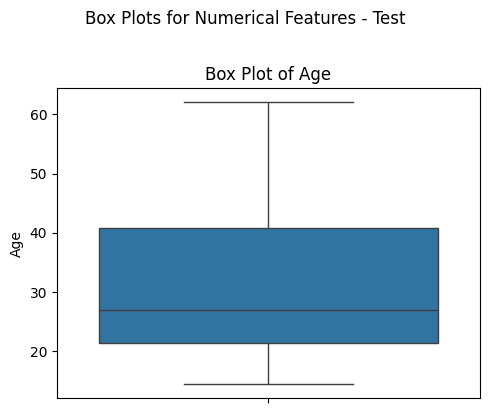


--- Visualizing Categorical Columns (7) for Test ---

Generating Count Plots...


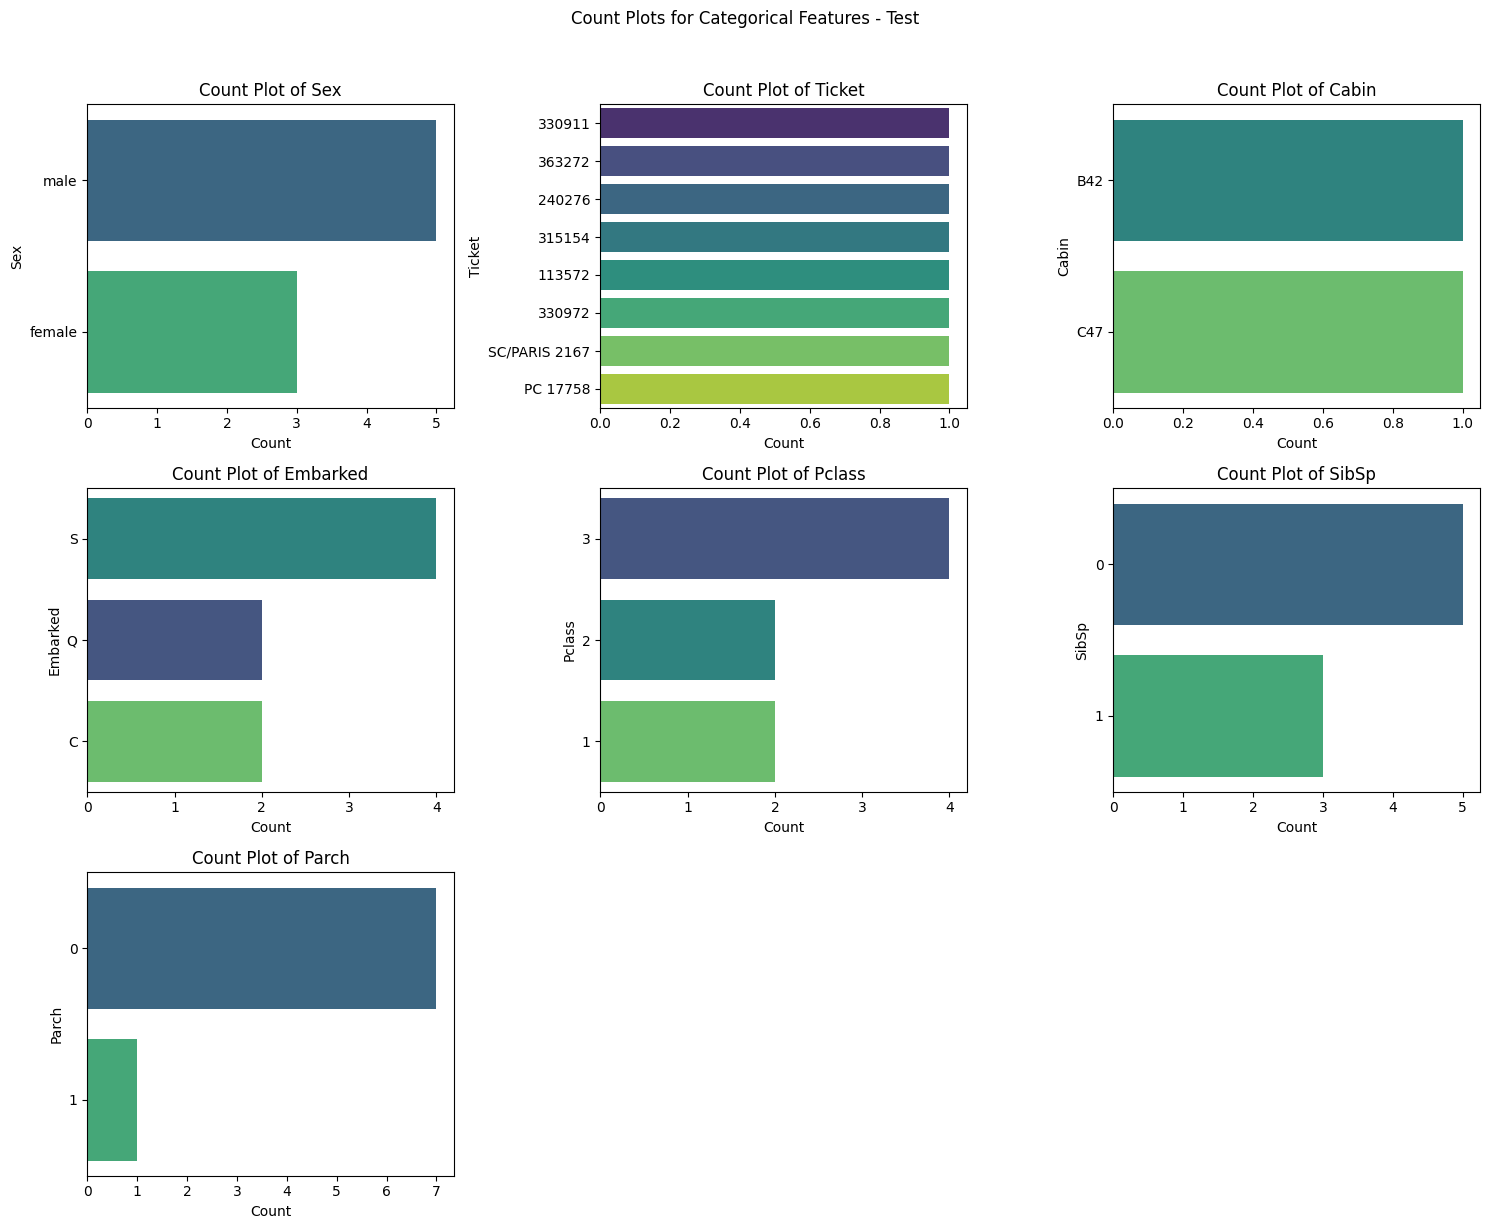


          End of Data Visualization


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

# ==================================================
# Define sample DataFrames based on the image descriptions (Titanic)
# ==================================================
# Sample data for training (df_train)
data_train = {
    'Survival': [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], # 0 = No, 1 = Yes
    'Pclass': [3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1],   # Ticket class: 1, 2, 3
    'Sex': ['male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'female'], # Sex: male, female
    'Age': [22.0, 38.0, 26.0, 35.0, 35.0, np.nan, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0], # Age of passenger (continuous)
    'SibSp': [1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0],    # Number of siblings / spouses aboard
    'Parch': [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0],    # Number of parents / children aboard
    'Ticket': ['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450', '330877', '17463', '349909', '347742', '237736', 'PP 9549', '110413'], # Ticket number (categorical)
    'Cabin': [np.nan, 'C85', np.nan, 'C123', np.nan, np.nan, 'E46', np.nan, np.nan, np.nan, 'G6', 'C103'], # Cabin number (categorical with many missing values)
    'Embarked': ['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S'] # Port of Embarkation (S, C, Q)
}
df_train = pd.DataFrame(data_train)

# Sample data for testing (df_test) - usually does not include the 'Survival' column
data_test = {
    'Pclass': [3, 3, 2, 3, 1, 3, 2, 1],
    'Sex': ['male', 'female', 'male', 'male', 'female', 'male', 'male', 'female'],
    'Age': [34.5, 47.0, 62.0, 27.0, 22.0, 14.5, 21.0, np.nan], # Age of passenger (continuous) - added NaN
    'SibSp': [0, 1, 0, 0, 1, 0, 1, 0],
    'Parch': [0, 0, 0, 0, 1, 0, 0, 0],
    'Ticket': ['330911', '363272', '240276', '315154', '113572', '330972', 'SC/PARIS 2167', 'PC 17758'],
    'Cabin': [np.nan, np.nan, np.nan, np.nan, 'B42', np.nan, np.nan, 'C47'],
    'Embarked': ['Q', 'S', 'Q', 'S', 'S', 'S', 'C', 'C']
}
df_test = pd.DataFrame(data_test)
# --- End of Sample Data Section ---


# Helper function to visualize the DataFrame (with countplot fix)
def visualize_dataframe(df, df_name):
    """
    Generates distribution and scatter plots for numerical and categorical columns.
    """
    print("\n" + "="*60)
    print(f"      Visualizing {df_name} Data ({df.shape[0]} rows, {df.shape[1]} columns)")
    print("="*60)

    if not isinstance(df, pd.DataFrame) or df.empty:
        print(f"'{df_name}' is not a valid or non-empty DataFrame. Skipping visualization.")
        return

    # 1. Separate column types
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

    potential_cats_from_num = []
    if numerical_cols:
      for col in numerical_cols:
          unique_count = df[col].nunique()
          # Treat low-cardinality integers as potentially categorical
          if unique_count < 20 and pd.api.types.is_integer_dtype(df[col].dropna()):
              potential_cats_from_num.append(col)
              if col not in categorical_cols:
                  categorical_cols.append(col)

    numerical_cols = [col for col in numerical_cols if col not in potential_cats_from_num]

    print(f"\nIdentified Numerical Columns: {numerical_cols}")
    print(f"Identified Categorical Columns: {categorical_cols}")

    # --- 2. Visualize Numerical (Continuous) Columns ---
    if numerical_cols:
        print(f"\n--- Visualizing Numerical Columns ({len(numerical_cols)}) for {df_name} ---")

        # a) Histograms and Density Plots (KDE)
        print("\nGenerating Histograms and Density Plots...")
        num_plots = len(numerical_cols)
        ncols_grid = min(num_plots, 3)
        nrows_grid = int(np.ceil(num_plots / ncols_grid))

        plt.figure(figsize=(ncols_grid * 5, nrows_grid * 4))
        for i, col in enumerate(numerical_cols):
            plt.subplot(nrows_grid, ncols_grid, i + 1)
            try:
                sns.histplot(df[col].dropna(), kde=True)
                plt.title(f'Distribution of {col}')
                plt.xlabel(col)
                plt.ylabel('Frequency')
            except Exception as e:
                print(f"  Could not plot histogram for {col}: {e}")
        plt.suptitle(f'Histograms & Density Plots for Numerical Features - {df_name}', y=1.02)
        plt.tight_layout(rect=[0, 0, 1, 1])
        plt.show()

        # b) Box Plots
        print("\nGenerating Box Plots...")
        plt.figure(figsize=(ncols_grid * 5, nrows_grid * 4))
        for i, col in enumerate(numerical_cols):
            plt.subplot(nrows_grid, ncols_grid, i + 1)
            try:
                sns.boxplot(y=df[col].dropna())
                plt.title(f'Box Plot of {col}')
                plt.ylabel(col)
            except Exception as e:
                print(f"  Could not plot boxplot for {col}: {e}")
        plt.suptitle(f'Box Plots for Numerical Features - {df_name}', y=1.02)
        plt.tight_layout(rect=[0, 0, 1, 1])
        plt.show()

        # c) Pair Plot (for bivariate relationships)
        if len(numerical_cols) > 1 and len(numerical_cols) <= 7: # Adjustable threshold
            print("\nGenerating Pair Plot...")
            try:
                sns.pairplot(df[numerical_cols].dropna())
                plt.suptitle(f'Pair Plot of Numerical Features - {df_name}', y=1.02)
                plt.show()
            except Exception as e:
                print(f"  Could not generate pairplot: {e}")
        elif len(numerical_cols) > 7:
            print("\nSkipping Pair Plot (too many numerical features).")

    else:
        print(f"\n--- No continuous numerical columns identified to visualize for {df_name} ---")


    # --- 3. Visualize Categorical/Object (Discrete) Columns ---
    if categorical_cols:
        print(f"\n--- Visualizing Categorical Columns ({len(categorical_cols)}) for {df_name} ---")
        print("\nGenerating Count Plots...")
        num_plots = len(categorical_cols)
        ncols_grid = min(num_plots, 3)
        nrows_grid = int(np.ceil(num_plots / ncols_grid))

        plt.figure(figsize=(ncols_grid * 5, nrows_grid * 4))
        for i, col in enumerate(categorical_cols):
             unique_count = df[col].nunique()
             if unique_count > 50: # Adjustable threshold
                 print(f"  Skipping count plot for '{col}' (too many unique values: {unique_count}).")
                 ax = plt.subplot(nrows_grid, ncols_grid, i + 1)
                 ax.text(0.5, 0.5, f"'{col}'\nToo many unique values\n({unique_count})",
                         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
                         fontsize=10, wrap=True)
                 ax.set_xticks([])
                 ax.set_yticks([])
                 plt.title(f'Count Plot of {col} (Skipped)')
                 continue

             plt.subplot(nrows_grid, ncols_grid, i + 1)
             try:
                 order = df[col].value_counts().index
                 # **** Modified line to address FutureWarning ****
                 sns.countplot(y=df[col].astype(str),       # Variable on y-axis
                               hue=df[col].astype(str),     # Same variable for hue (coloring)
                               order=order.astype(str),   # Order of bars
                               palette='viridis',         # Color palette
                               legend=False)              # Disable the legend
                 # **** End of modification ****
                 plt.title(f'Count Plot of {col}')
                 plt.xlabel('Count')
                 plt.ylabel(col)
             except Exception as e:
                  print(f"  Could not plot countplot for {col}: {e}")
        plt.suptitle(f'Count Plots for Categorical Features - {df_name}', y=1.02)
        plt.tight_layout(rect=[0, 0, 1, 1])
        plt.show()

    else:
        print(f"\n--- No categorical columns found to visualize for {df_name} ---")

# --- Run Visualization ---
if 'df_train' in locals() or 'df_train' in globals():
    visualize_dataframe(df_train, 'Training')
else:
    print("\nError: DataFrame 'df_train' does not exist.")

if 'df_test' in locals() or 'df_test' in globals():
    visualize_dataframe(df_test, 'Test')
else:
    print("\nError: DataFrame 'df_test' does not exist.")

print("\n" + "="*60)
print("          End of Data Visualization")
print("="*60)